# Creating work environment and loading data.


In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/math482-2024-2025-1-hw-01/sample_submission.csv
/kaggle/input/math482-2024-2025-1-hw-01/train.csv
/kaggle/input/math482-2024-2025-1-hw-01/test.csv


In [2]:
data_train = pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-01/train.csv") #reading train data
data_test = pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-01/test.csv") #reading test data

# Overview of the Data


**Training Data**

The training dataset contains 15,000 rows and 19 columns.

**Features**: Includes variables like clonesize, honeybee, bumbles, andrena, osmia, temperature ranges (MaxOfUpperTRange, MinOfUpperTRange, etc.), RainingDays, and fruitset. All of these features are numerical so it will be easy to work with most of the regression models.

**Target Variable:** yield (the blueberry yield we aim to predict).

**No Missing Values:** All columns are fully populated.

In [3]:
data_train


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,294.0,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.493690,0.433195,33.743494,5575.39447
1,1,684.0,25.0,0.50,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.632109,0.513261,43.670272,8489.69192
2,2,262.0,12.5,0.25,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.498952,0.442529,36.362937,5711.85174
3,3,19.0,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.429581,0.418220,33.299022,4926.27902
4,4,708.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.437424,0.430114,32.514844,4865.39997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,175.0,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.627442,0.519045,44.599471,8823.69011
14996,14996,76.0,12.5,0.25,0.25,0.25,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.525948,0.460369,37.251242,6315.23321
14997,14997,192.0,12.5,0.25,0.25,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.556302,0.471829,38.639843,6638.65649
14998,14998,13.0,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.334594,0.377566,27.345454,3139.43255


In [4]:
# Check for missing values in the dataset
missing_values = data_train.isnull().sum()

# Display only columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values found:")
    print(missing_columns)

No missing values in the dataset.


**Test Data**

The test dataset contains 10,000 rows and 18 columns and there are no missing values. It matches the structure of the training data.


In [5]:
data_test

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,477.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.447781,0.419852,33.331194
1,15001,111.0,12.5,0.25,0.25,0.25,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.545095,0.466475,37.782288
2,15002,256.0,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.508992,0.453001,36.685413
3,15003,186.0,12.5,0.25,0.25,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.442627,0.424031,33.303900
4,15004,364.0,12.5,0.25,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.574989,0.482860,40.126092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,673.0,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.507542,0.443962,35.520534
9996,24996,716.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.509001,0.450786,37.013557
9997,24997,151.0,12.5,0.25,0.25,0.38,0.25,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.509782,0.408171,32.797666
9998,24998,743.0,25.0,0.50,0.38,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.520756,0.433195,35.557537


In [6]:
# Check for missing values in the dataset
missing_values = data_test.isnull().sum()

# Display only columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values found:")
    print(missing_columns)

No missing values in the dataset.


# Exploring Data

In the correlation matrix below, we can see that features such as **fruitset**, **seeds**, and **fruitmass** show strong positive correlations with yield, indicating that higher values in these features are associated with increased blueberry yield. 

Conversely, **RainingDays** and **AverageRainingDays** show a strong-ish negative correlation with yield.

Lastly, temperature-related features (**MaxOfUpperTRange**, **AverageOfUpperTRange**, etc.) show no correlation with the yield and high correlation with each other these can be excluded to simplify the model and prevent multicollinearity.


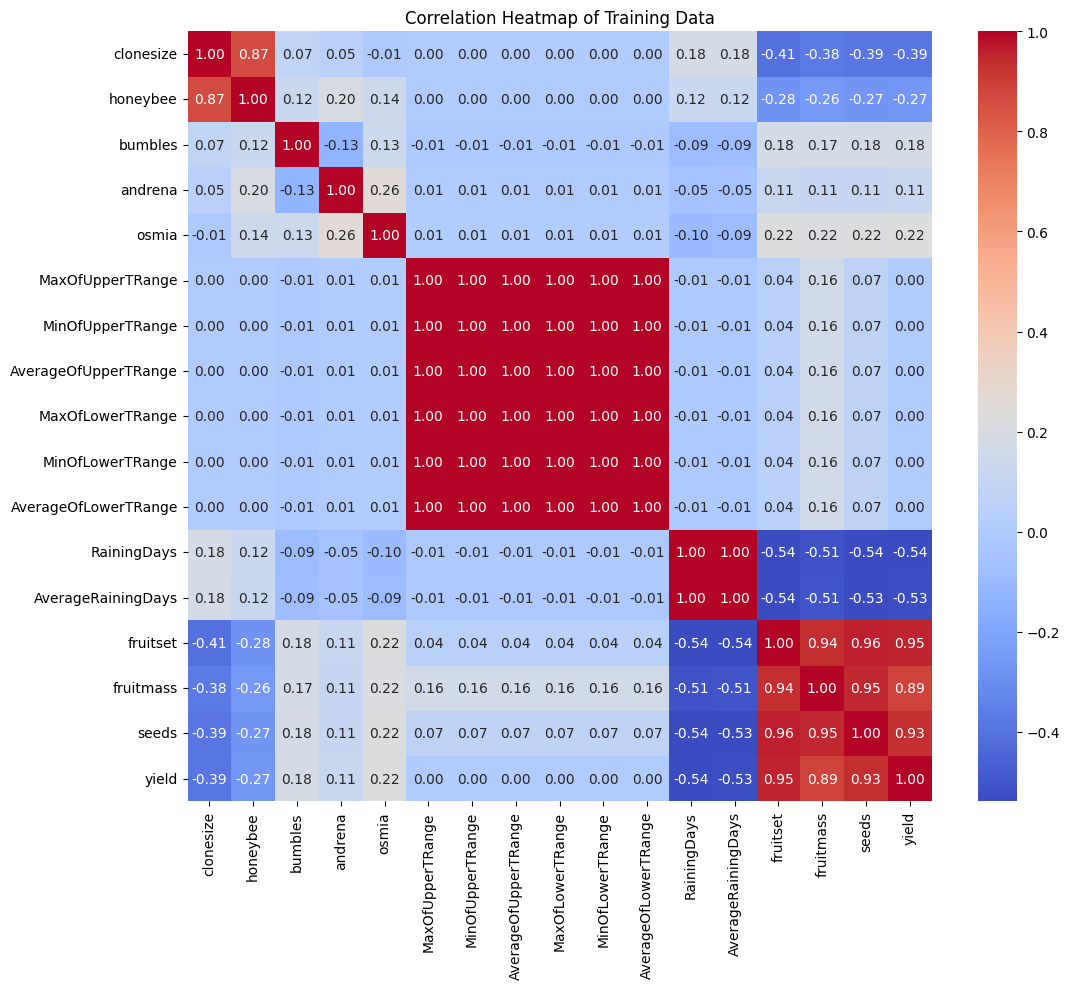

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix_filtered = data_train.drop(columns=['id', 'Row#']).corr(numeric_only=True, method = "spearman")

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Training Data")
plt.show()


# Checking for Outliers

I plotted boxplots for the top five features with the highest correlation coefficients with the target variable to identify potential outliers. From the plots, it is evident that the features "fruitmass," "seeds," and "fruitset" have a significant number of outliers. Since these features have strong correlations with the target variable, I will remove their outliers to prevent them from interfering with the accuracy of the predictions. This will ensure that the model focuses on meaningful patterns without being distorted by extreme values.

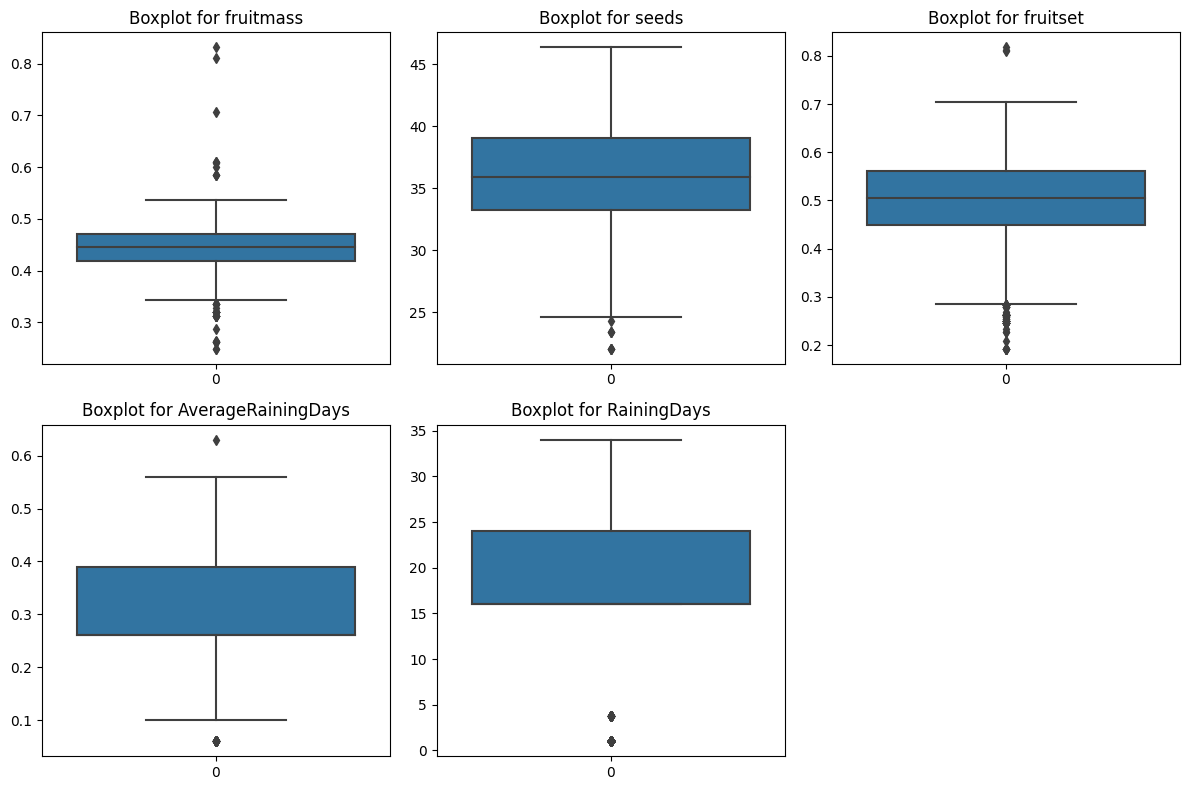

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



# List of features to visualize
features_to_plot = ["fruitmass", "seeds", "fruitset", "AverageRainingDays", "RainingDays"]

# Create boxplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a grid (2 rows, 3 columns)
    sns.boxplot(data=data_train[feature])
    plt.title(f"Boxplot for {feature}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# Scaling the Data

Since I will use LinearRegressor for this model, I have to scale the data. Because linear regression assumes that all features contribute equally to the prediction and this leads features with high numerical values to dominate the calculation. 

In [9]:
# Prepare the training dataset (excluding 'id' and 'Row#')
X_train = data_train.drop(columns=['id', 'Row#', 'yield'])
y_train = data_train['yield']

X_val = data_test.drop(columns=['id', 'Row#'])

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert the scaled arrays back to a DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)


# Exclude the Non-Correlated and Redundant Features
We should exclude the features that show little to no correlation with the target value to simplify the model because they don't affect the outcome in any meaningful way. Additionally, we should remove the features that show a high correlation with each other(redundant) because they lead to multicollinearity.

In [10]:
# Identify the features that have a correlation coefficient less than 0.2 in the correlation matrix
low_correlation_features = ["MaxOfUpperTRange", "MinOfUpperTRange", "AverageOfUpperTRange", "MaxOfLowerTRange",
                            "MinOfLowerTRange", "AverageOfLowerTRange", "andrena", "bumbles"]

# Drop low-correlation features from training and validation datasets
X_train_filtered = X_train.drop(columns=low_correlation_features)
X_val_filtered = X_val.drop(columns=low_correlation_features)

# We will exclude one of the features from the pairs of features that have a high correlation between them.
# We will exclude the one that has less correlation with the target value.
redundant_features = ["RainingDays"]

# Drop redundant features from training and validation datasets
X_train_final = X_train_filtered.drop(columns=redundant_features)
X_val_final = X_val_filtered.drop(columns=redundant_features)


I didn't exclude the "seed" and "fruitmass" features because they contribute to the prediction indirectly by affecting other features.

# Remove Outliers

We will remove the outliers from the features that have a high correlation with the target value because the outliers from those features deviate the prediction most. I will use iqr method to remove outliers.

In [11]:
# Function to remove outliers and maintain consistency with the target variable
def remove_outliers_iqr_with_target(X, y, features):
    for feature in features:
        Q1 = X[feature].quantile(0.25)
        Q3 = X[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (X[feature] >= lower_bound) & (X[feature] <= upper_bound)
        X = X[mask]
        y = y[mask]
    return X, y


features_to_clean = ["fruitmass", "seeds", "fruitset"]

# Apply the updated function to remove outliers from both X_train and y_train
X_train_cleaned, y_train_cleaned = remove_outliers_iqr_with_target(X_train_final, y_train, features_to_clean)

# Adding Polynomial Features and Training the Model
At this stage, the linear regressor only captures the linear relations. We will include polynomial features so that the model can capture more complex relations between the features and the target value.

In [12]:
# Transform cleaned data with PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_cleaned)
X_val_poly = poly.transform(X_val_final)

# Train the Linear Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_cleaned)

LinearRegression()

# Prediciton and Response Generation

In [13]:
# Evaluate the model
y_pred_poly = poly_model.predict(X_val_poly)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': data_test['id'],  # Ensure this matches the column name in your test dataset
    'yield': y_pred_poly
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv
